# Análise exploratória de dados sobre compartilhamento de bicicletas em Londres

## Composição do dataset
    
"timestamp" - campo timestamp    
"cnt" - Contagem de novos compartilhamentos de bicicletas      
"t1" - real temperatura em C     
"t2" - temperatura em C "sensação térmica"     
"hum" - umidade em porcentagem      
"windspeed" - velocidade do vento em km/h     
"weathercode" - categoria do tempo     
"isholiday" - 1 feriado / 0 não é feriado     
"isweekend" - 1 se o dia for fim de semana    
"season" - estações meteorológicas: 0-primavera; 1-verão; 2-outono; 3-inverno..    
      
"weathe_code" category description:      
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

Dados: <https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset>

## Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Lendo o dataset

In [2]:
df = pd.read_csv('data/london_merged.csv')

In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Observando a presença de valores nulos

In [6]:
df.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

## Engenharia de atributos

In [7]:
# dicionário com o significado dos códigos
weather = {1:'Clear', 2:'few clouds', 3:'Broken clouds', 4:'Cloudy',7:'Light rain', 
           10:'rain with thunderstorm', 26:'snowfall', 94:'Freezing Fog'}

# replace
df['weather'] = df['weather_code'].replace(weather)

In [8]:
# dicionário com o significado dos códigos
season = {0:'spring', 1:'summer', 2:'fall', 3:'winter'}

# replace
df['season'] = df['season'].replace(season)

In [9]:
# dicionário com o significado dos códigos
is_holiday = {0:'No', 1:'Yes'}

# replace
df['is_holiday'] = df['is_holiday'].replace(is_holiday)

In [10]:
# dicionário com o significado dos códigos
is_weekend = {0:'No', 1:'Yes'}

# replace
df['is_weekend'] = df['is_weekend'].replace(is_weekend)

In [11]:
# Convertendo a coluna timestamp em pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraindo hora, mês e dia
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.strftime('%A')
df['month'] = df['timestamp'].dt.month_name()

In [12]:
# drop da coluna weather_code
df.drop('weather_code', axis=1, inplace=True)

In [13]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,weather,hour,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,No,Yes,winter,Broken clouds,0,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,No,Yes,winter,Clear,1,Sunday,January
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,No,Yes,winter,Clear,2,Sunday,January
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,No,Yes,winter,Clear,3,Sunday,January
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,No,Yes,winter,Clear,4,Sunday,January


## Análise exploratória

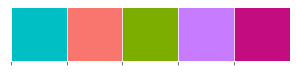

In [14]:
# palette
colors = ['#00BFC4', '#F8766D', '#7CAE00', '#c77CFF', '#C20C80']

sns.set_palette(colors)
sns.palplot(sns.color_palette())

In [15]:
print(df['timestamp'].min(), df['timestamp'].max())

2015-01-04 00:00:00 2017-01-03 23:00:00


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
hour,17414.0,11.513265,6.915893,0.0,6.0,12.0,18.00,23.0


### Análise inicial

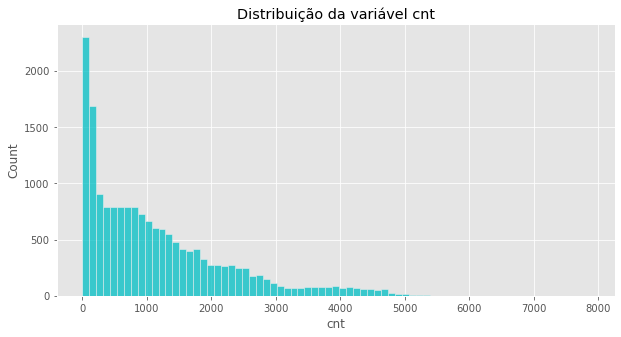

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['cnt'])
plt.title('Distribuição da variável cnt') 
plt.show()         

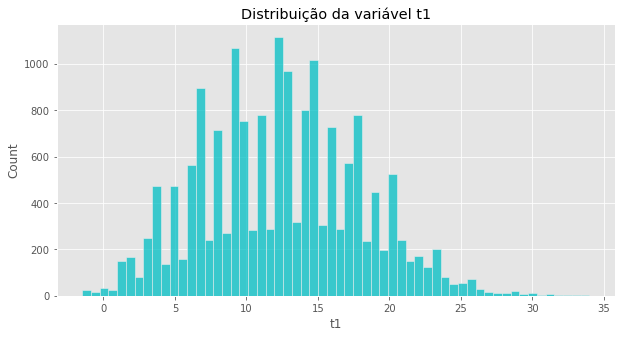

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['t1'])
plt.title('Distribuição da variável t1') 
plt.show()   

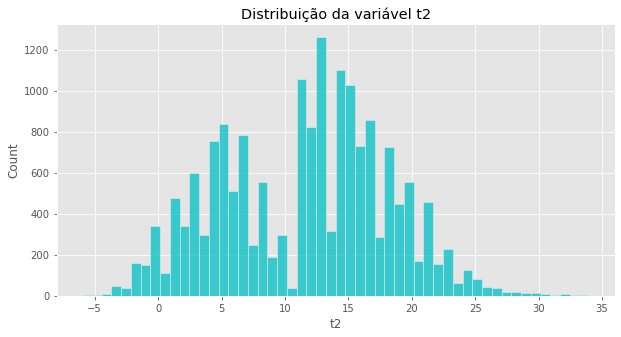

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['t2'])
plt.title('Distribuição da variável t2') 
plt.show()  

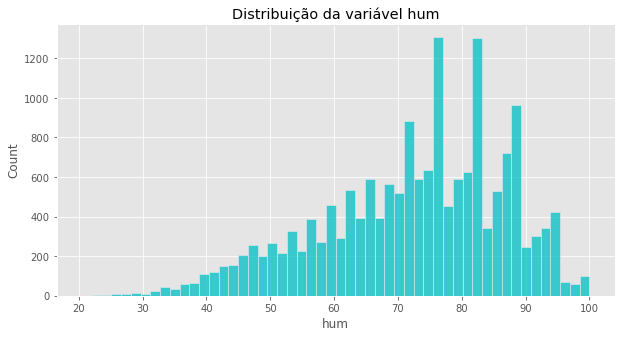

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['hum'])
plt.title('Distribuição da variável hum') 
plt.show()  

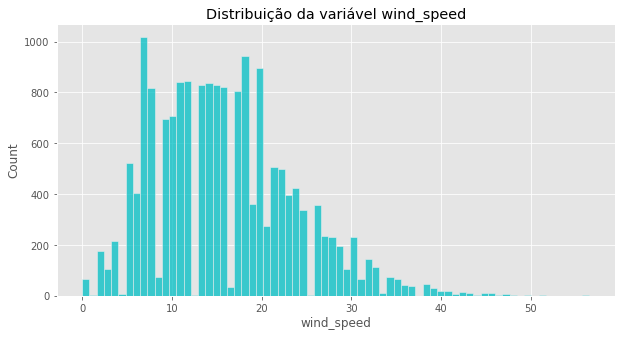

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['wind_speed'])
plt.title('Distribuição da variável wind_speed') 
plt.show()  

Text(0.5, 0, 'Date')

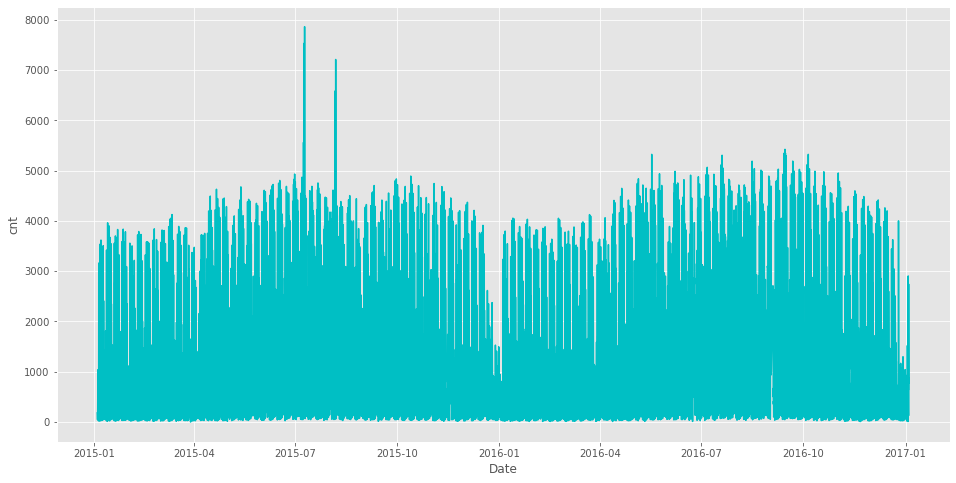

In [22]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=df.timestamp, y=df.cnt)
plt.xlabel('Date')

#### OBS: As demais colunas são relacionadas a tempo e clima, então decidi tratar mais a frente

### Análise multivariada

Text(0.5, 1.0, 'Mapa de correlação')

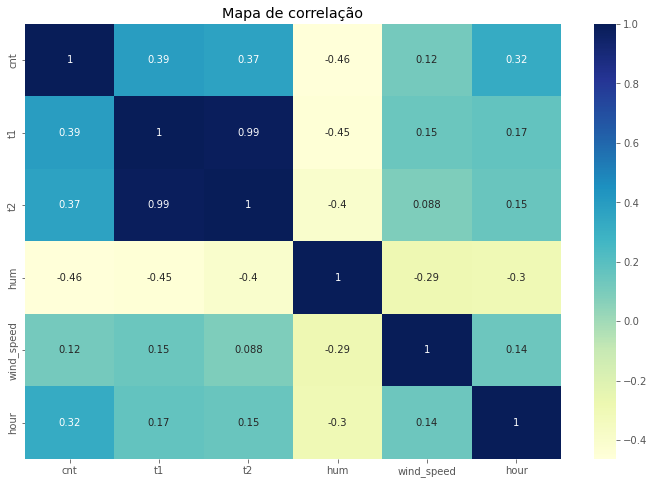

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)
plt.title('Mapa de correlação')

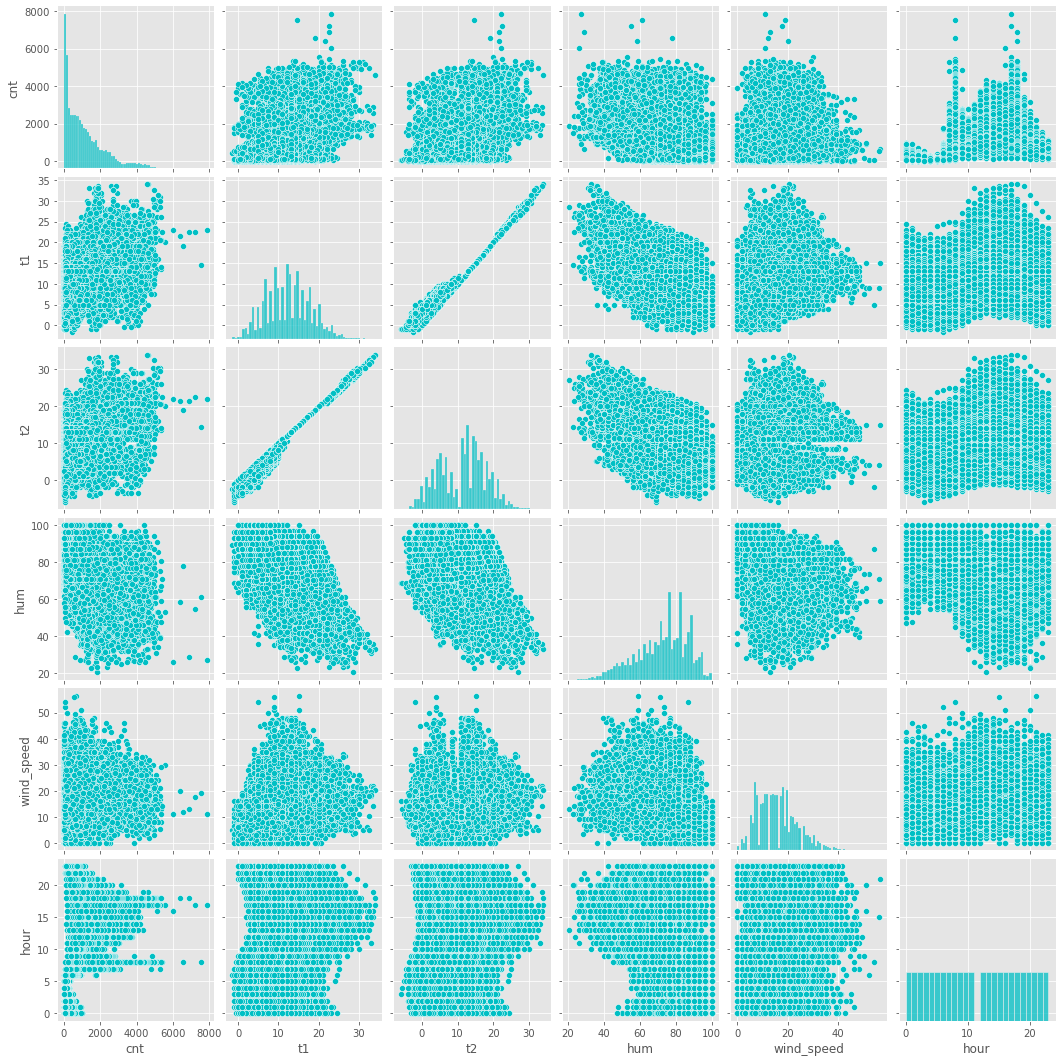

In [24]:
sns.pairplot(data=df)

## Tratamento de outliers

Outliers são dados que se distanciam muito dos outros e podem ser um problema para analistas e cientistas de dados, pois são nocivos para algumas categorias de algoritmos e criam um entendimento errado sobre os dados e seus resultados.
    
Existem algumas maneiras de tratá-los, as principais são o drop de dados discrepantes, a substituição por alguma medida ou a padronização deles.

---



<AxesSubplot:>

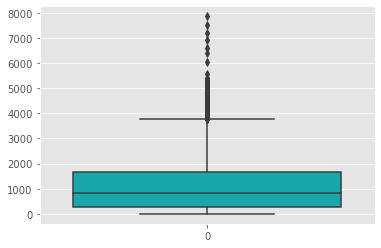

In [25]:
# como a coluna cnt tem uma escala maior que as demais decidir criar um plot separado para ela
sns.boxplot(data=df['cnt'])

<AxesSubplot:>

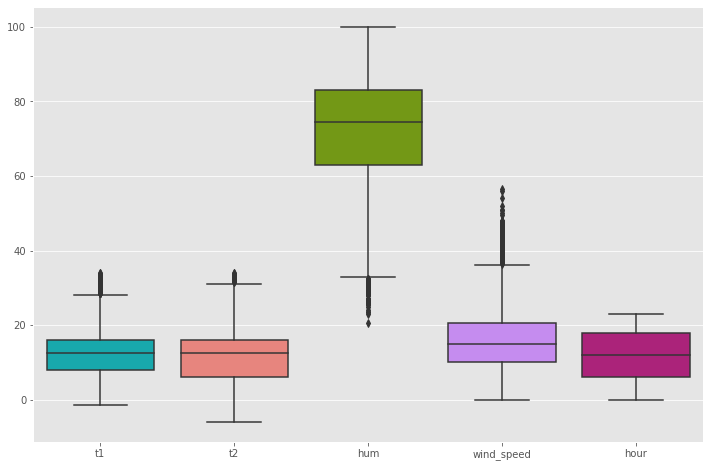

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('cnt', axis=1))

In [27]:
# Criando função para substituir os valores discrepantes por upper e lower
def tratamneto_outliers(columns):
  for col in columns:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

In [28]:
# Aplicando a função
tratamneto_outliers(['cnt', 't1', 't2','hum', 'wind_speed'])

<AxesSubplot:>

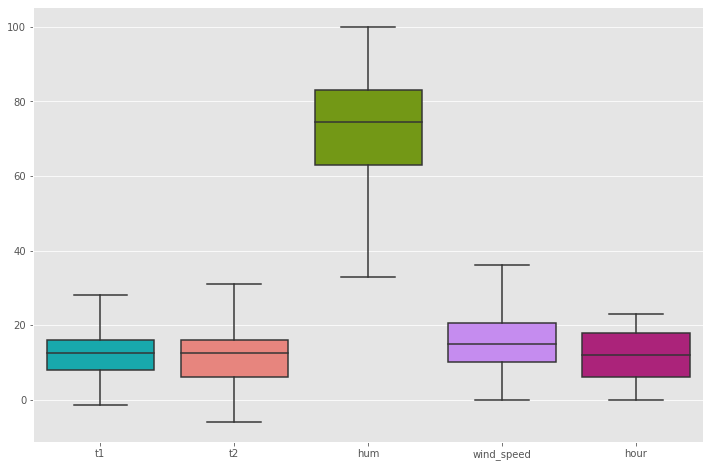

In [29]:
# Resultado
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('cnt', axis=1))

## Hipóteses 

### **1- A média de uso em feriados é maior que em dias normais?**

<AxesSubplot:xlabel='is_holiday', ylabel='cnt'>

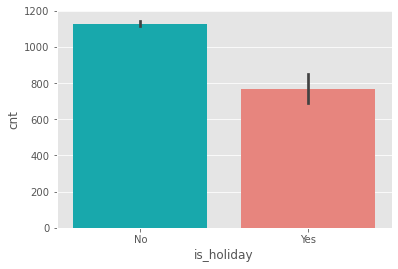

In [30]:
sns.barplot(x='is_holiday', y='cnt', estimator=np.mean, data=df)

Resposta: Não

### **2- A média de uso em finais de semana é maior que em dias da semana?**

<AxesSubplot:xlabel='is_weekend', ylabel='cnt'>

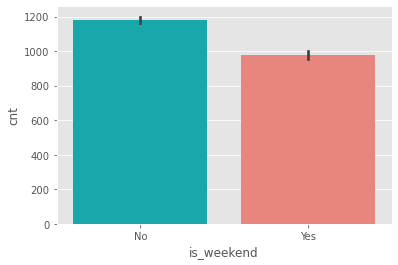

In [31]:
sns.barplot(x='is_weekend', y='cnt', estimator=np.mean, order=['No', 'Yes'], data=df)

Resposta: Não

### **3- A média de uso no final da tarde é maior que em outros períodos do dia?**

Text(0.5, 1.0, 'Uso por hora do dia')

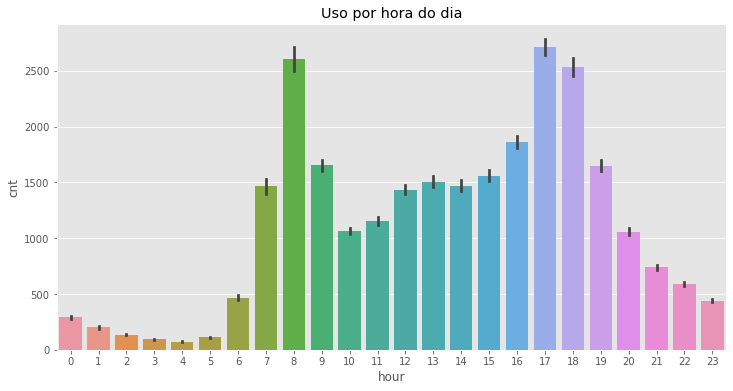

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='cnt', estimator=np.mean, data=df)
plt.title('Uso por hora do dia')


Resposta: Parcialmente, pois é possível identificar um pico de uso as oito da manhã

### **4- O pico de uso do serviço ocorre durante os meses de verão e férias no hemisfério norte?**

Text(0.5, 1.0, 'Uso por estação do ano')

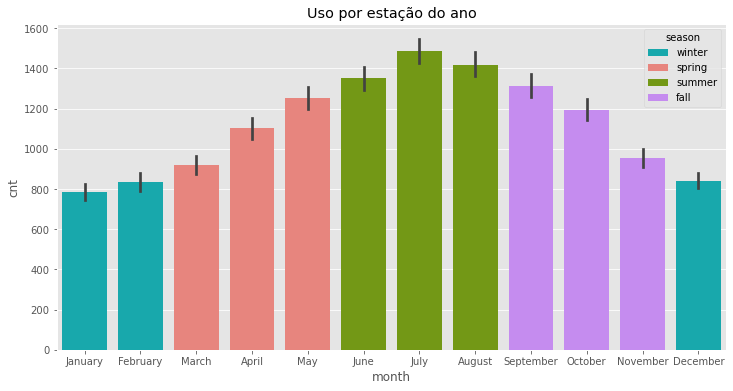

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', estimator=np.mean, hue='season', dodge=False, data=df)
plt.title('Uso por estação do ano')

Resposta: Certo

### **5- A média de uso do serviço em momentos de tempo limpo ou com poucas nuvens é maior que nos demais?**

Text(0.5, 1.0, 'Tempo limpo ou parcialmente nublado')

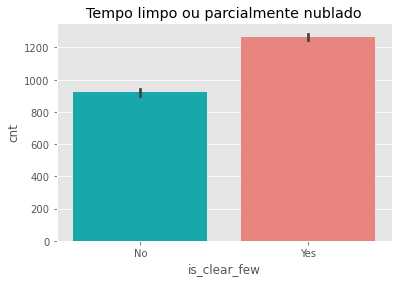

In [34]:
df['is_clear_few'] = df['weather'].apply(lambda x: 'Yes' if x=='Clear' or x=='few clouds' else 'No')

sns.barplot(x='is_clear_few', y='cnt', estimator=np.mean, data=df)
plt.title('Tempo limpo ou parcialmente nublado')

Resposta: Sim

## Insights
    
#### 1- Uso maior no meio da semana, o que poder indicar que existe um hábito no uso de bicicletas mais regular na cidade    
#### 2- Feriados são menos escolhidos para o uso do serviço que dias normais     
#### 3- Início do dia e final da tarde são os horários preferidos pelos clientes, o que vai de encontro com o começo e final de expediente      
#### 4- O uso durante o ano é caracterizado no aumento gradual até atingir o pico nos meses de verão e apos isso uma queda na utilização, esse padrão coincidir com as férias no hemisfério norte     
#### 5- Como esperado a condição do tempo é de grande importância na decisão do cliente em utilizar ou não o serviço com forte tendência por dias claros e/ou parcialmente nublados     


# **Obrigado!**